### Using Tf-idf and LDA for Topic Modeling

I wanted to implement simple text feature extraction and topic modeling to identify the top topics in state of the union addresses. For now, the output is a series of word clouds but it would be interesting to see how these topics' prevalence rise and fall over time. 

In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from random import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [2]:
# import data
df = pd.read_pickle('data/clean_speech_approvals.pkl')
df.set_index('president', inplace=True)

In [3]:
sotu_corpus = list(df.speech)

In [4]:
no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(sotu_corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [5]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(sotu_corpus)
tf_feature_names = tf_vectorizer.get_feature_names()

In [6]:
no_topics = 4

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [7]:
# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5, learning_method='online', learning_offset=50.,
                                random_state=0).fit(tf)

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [9]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        data = ' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        title = 'Topic {}'.format(topic_idx+1)
        show_wordcloud(data, title)        

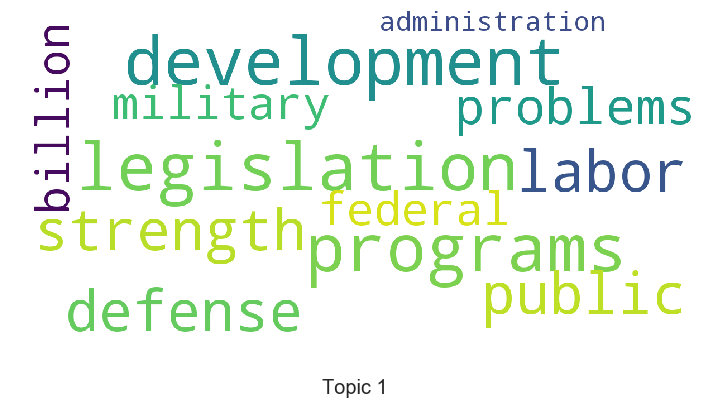

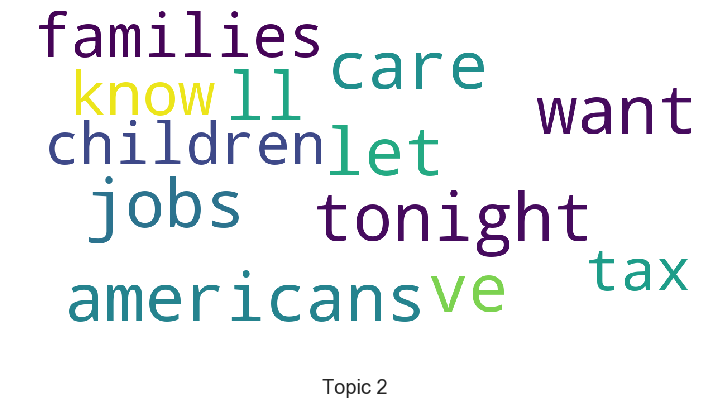

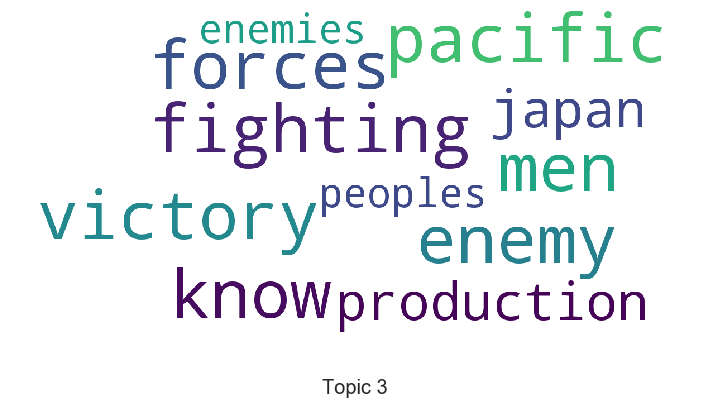

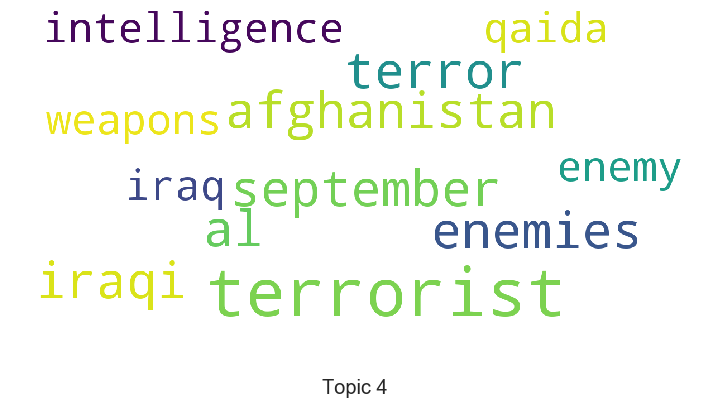

In [10]:
no_top_words = 13
display_topics(nmf, tfidf_feature_names, no_top_words)

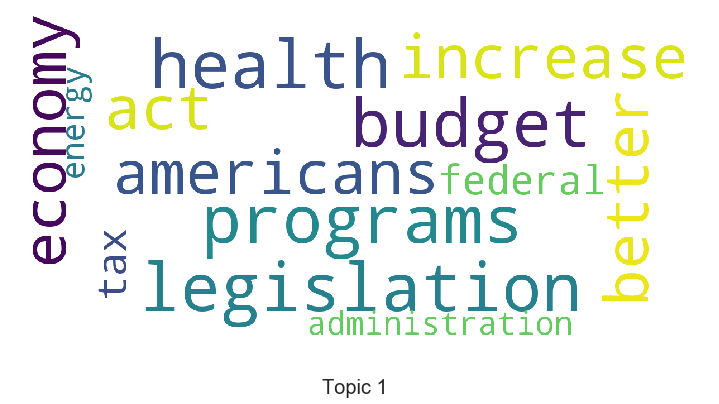

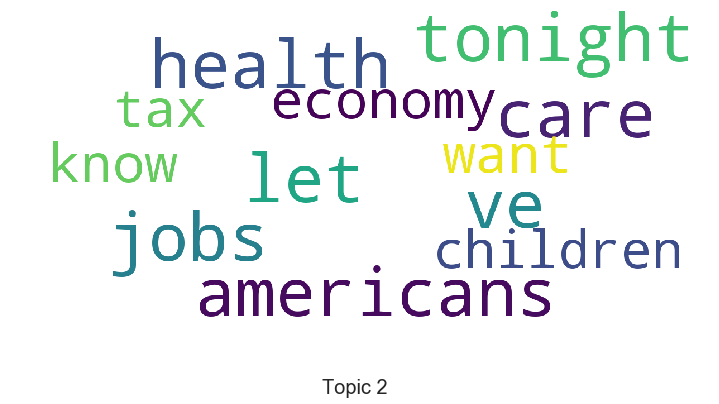

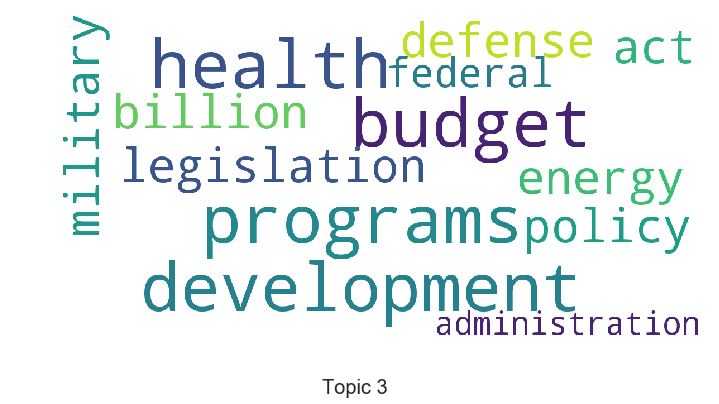

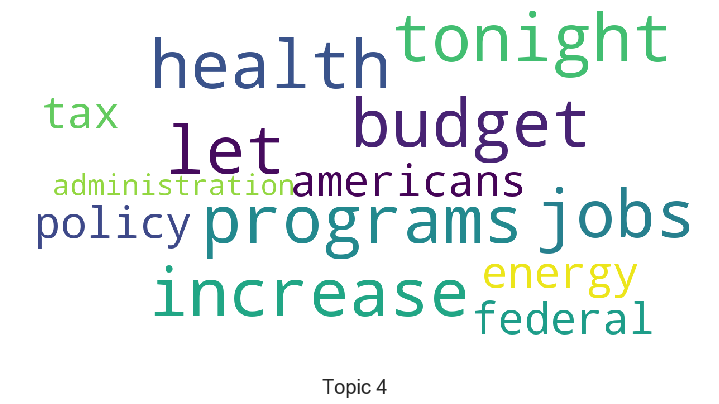

In [11]:
display_topics(lda, tf_feature_names, no_top_words)

In [13]:
pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)

/Users/ratulesrar/anaconda3/lib/python3.5/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      56.714646        1       1 -0.037165 -0.000314
1      40.327882        1       2  0.043230 -0.000141
3       1.483528        1       3 -0.002510 -0.003754
0       1.473944        1       4 -0.003555  0.004209, topic_info=     Category       Freq            Term      Total  loglift  logprob
term                                                                 
358   Default  10.000000         federal  10.000000  30.0000  30.0000
40    Default   6.000000  administration   6.000000  29.0000  29.0000
67    Default   9.000000       americans   9.000000  28.0000  28.0000
523   Default   6.000000             let   6.000000  27.0000  27.0000
121   Default   6.000000          budget   6.000000  26.0000  26.0000
904   Default   6.000000             tax   6.000000  25.0000  25.0000
690   Default   6.000000        programs   6.000000  24.0000  24.0000
311   Default   5.000000          energy   5.000000  23.0000  23.0000
417   Default   7.000000          health   7.000000  22.0000  22.0000
521   Default   5.000000     legislation   5.000000  21.0000  21.0000
926   Default   5.000000         tonight   5.000000  20.0000  20.0000
288   Default   6.000000         economy   6.000000  19.0000  19.0000
656   Default   4.000000          policy   4.000000  18.0000  18.0000
492   Default   5.000000            jobs   5.000000  17.0000  17.0000
31    Default   5.000000             act   5.000000  16.0000  16.0000
112   Default   5.000000         billion   5.000000  15.0000  15.0000
457   Default   4.000000        increase   4.000000  14.0000  14.0000
502   Default   6.000000            know   6.000000  13.0000  13.0000
150   Default   5.000000        children   5.000000  12.0000  12.0000
496   Default   5.000000            just   5.000000  11.0000  11.0000
242   Default   4.000000         defense   4.000000  10.0000  10.0000
961   Default   5.000000              ve   5.000000   9.0000   9.0000
289   Default   4.000000       education   4.000000   8.0000   8.0000
136   Default   4.000000            care   4.000000   7.0000   7.0000
261   Default   4.000000     development   4.000000   6.0000   6.0000
894   Default   5.000000         support   5.000000   5.0000   5.0000
445   Default   3.000000       important   3.000000   4.0000   4.0000
706   Default   4.000000         provide   4.000000   3.0000   3.0000
127   Default   4.000000        business   4.000000   2.0000   2.0000
574   Default   4.000000        military   4.000000   1.0000   1.0000
...       ...        ...             ...        ...      ...      ...
445    Topic4   0.056353       important   3.645463   0.0476  -5.9465
358    Topic4   0.111068         federal  10.065689  -0.2895  -5.2680
289    Topic4   0.064168       education   4.587312  -0.0523  -5.8167
110    Topic4   0.064909          better   4.707328  -0.0667  -5.8052
40     Topic4   0.079804  administration   6.489892  -0.1812  -5.5986
656    Topic4   0.061989          policy   4.481078  -0.0634  -5.8512
417    Topic4   0.085193          health   7.312523  -0.2352  -5.5333
988    Topic4   0.047453           women   3.011809   0.0667  -6.1184
288    Topic4   0.079233         economy   6.873496  -0.2458  -5.6058
127    Topic4   0.058547        business   4.265773  -0.0713  -5.9084
706    Topic4   0.057495         provide   4.264976  -0.0893  -5.9265
436    Topic4   0.042984         housing   2.656799   0.0932  -6.2174
904    Topic4   0.076307             tax   6.828660  -0.2769  -5.6434
569    Topic4   0.050476             men   3.487321  -0.0182  -6.0567
121    Topic4   0.070449          budget   6.313298  -0.2783  -5.7233
112    Topic4   0.064219         billion   5.471097  -0.2277  -5.8159
437    Topic4   0.048065           human   3.326216  -0.0198  -6.1056
702    Topic4   0.043788         protect   2.835095   0.0468  -6.1988
311    Topic4   0.064228          energy   5.911567  -0.3050  -

/Users/ratulesrar/anaconda3/lib/python3.5/site-packages/simplejson/encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2018-05-31 14:42:06.815824. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
